# 머신러닝 회귀
# 🐸캐굴캐굴 필사 스터디 5주차
## [🏠Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)
### Code #1 [Outlier!!! The Silent Killer](https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer)
### Code #2 [Gradient Boosting Regressor R^2 = 0.85](https://www.kaggle.com/code/benjaminjamesrichard/gradient-boosting-regressor-r-2-0-85)
### 모델링 참고 : [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook)

<br>

5주차 학습 기간 : 23.02.27 ~ 23.03.06      
주제 : Melbourne Housing Market Dataset (ML REG)     
- 주택 구매자가 구매 결정을 내릴 수 있도록 멜버른 부동산 시장 주택 가격을 가장 정확하게 예측하는 회귀 분석 모델을 만들어낸다. 
- 평가 지표 : R^2 score, 평균 절대 오차(MAE), 평균 제곱 오차(MSE) 및 RMSE(Root Mean Square Error)
- GBR 모델과 RF 모델의 평가지표를 보고 어떤 모델이 적합한지 판단
    - RMSE와 MSE의 차이와 데이터셋에 맞는 평가 지표 선택

### About Dataset 
#### 📌생각해봐야할 것들     
>1) 정확히 언제?     
2) 전반적인 총 주택 가격, 판매량 대 미판매량, 임대 아파트 판매의 증가 및 주택 판매의 감소, CouncilArea나 지역별 변화, 멜버른 중심지에서 떨어진 거리의 주택 판매 증가 및 가까운 거리의 주택 판매량 등이 감소되는 것을 미리 예측할 수 있는가?     
3) 변화를 보이는 변수가 무엇인가 ?      
4) ***Northcote***에서 침실 2개짜리 아파트를 사는 것을 더 미뤄야 할까요?   
-- 본 데이터셋을 게시한 목적 -> Target 변수가 될 것 같다  


- 부동산 크기, 토지 크기 및 의회 면적을 포함한 여러 데이터를 가지고 파생 변수를 더 만들어볼 수도 있을 것 같다 

# Libraries and Utilities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Package

In [ ]:
!pip install nb_black
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
  Created wheel for nb_black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=68a903584213c83784d89f25f68b0edfd6a1dd723913e18dc407c01a59ae05ca
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb_black
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00


## Load Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import math
import warnings

# Visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Stats and Metrics
from sklearn import metrics
from scipy import stats

# Models
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LassoCV

%matplotlib inline
%load_ext nb_black
warnings.filterwarnings("ignore")

# base_root 
root = f"/content/drive/MyDrive/캐굴캐굴/5주차"

<IPython.core.display.Javascript object>

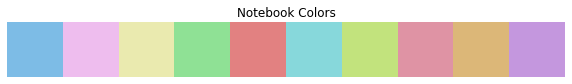

<IPython.core.display.Javascript object>

In [ ]:
colors = [
    "#7DBCE6",
    "#EEBDEE",
    "#EAEAAF",
    "#8FE195",
    "#E28181",
    "#87D8DB",
    "#C2E37D",
    "#DF93A4",
    "#DCB778",
    "#C497DE",
]
sns.palplot(sns.color_palette(colors))
plt.title("Notebook Colors", size=12)
plt.axis("off")
plt.show()

# Load and check data

In [ ]:
# File
df = pd.read_csv(f'{root}/Melbourne_housing_FULL.csv')
print(df.shape)
df.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<IPython.core.display.Javascript object>

**📌 Key Details**

>Suburb: 교외   
Address: 주소   
Rooms : 객실 수    
Price: 호주 달러 단위 가격     

**Method**   
>S - 매각된 부동산        
SP - 이전에 판매된 부동산 (선매물)       
PI - 양도받은 재산      
PN - 공개되지 않은 사전 판매    
SN - 공개되지 않은 판매    
NB - 무입찰   
VB - 공급업체 입찰    
W - 경매 전 철회    
SA - 경매 후 판매    
SS - 경매 가격 미공개 후 판매    
N/A - 가격 또는 최고 입찰가를 사용할 수 없습니다. - NaN ?       

**Type**    
>br - 침실    
h -  house, cottage, villa, semi, terrace    
u -  unit, duplex    
t - 타운하우스         
dev site -  development site       
o res - 기타 주거지   


>SellerG: 부동산 중개인     
Date: 판매된 날짜    
Distance: 중심 업무 지구(central business district)로부터의 거리(km)      
Regionname : 지역(서부, 북서부, 북부, 북동부 등)   
Propertycount: 주변 시설 수            
CouncilArea: 해당 지역의 관리 위원회   
Postcode : 우편번호

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<IPython.core.display.Javascript object>

In [ ]:
print('Categorical Features ')
print(df.select_dtypes(['object']).columns)
print()
print('Numeric Features')
print(df.select_dtypes(['int64','float64']).columns)

Categorical Features 
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

Numeric Features
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


<IPython.core.display.Javascript object>

# EDA 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<IPython.core.display.Javascript object>

## check for null and missing values

In [ ]:
df.isnull().mean()*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

<IPython.core.display.Javascript object>

### Missing Values

In [ ]:
df[~df.isnull()].isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<IPython.core.display.Javascript object>

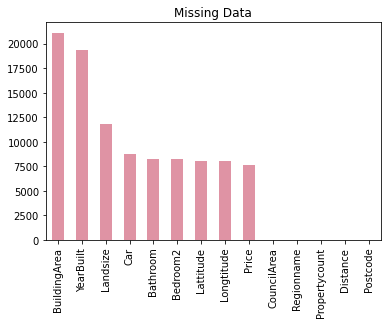

<IPython.core.display.Javascript object>

In [ ]:
#checking missing values
missing = df[~df.isnull()].isnull().sum()
missing[missing > 0].sort_values(ascending = False).plot.bar(color=colors[7])
plt.title('Missing Data');

## 기술 통계량

In [ ]:
df.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000000,3.031012,0.969933,1.000000,2.000000,3.000000,4.000000,16.000000
Price,27247.000000,1050173.344955,641467.130105,85000.000000,635000.000000,870000.000000,1295000.000000,11200000.000000
Distance,34856.000000,11.184929,6.788892,0.000000,6.400000,10.300000,14.000000,48.100000
Postcode,34856.000000,3116.062859,109.023903,3000.000000,3051.000000,3103.000000,3156.000000,3978.000000
Bedroom2,26640.000000,3.084647,0.980690,0.000000,2.000000,3.000000,4.000000,30.000000
Bathroom,26631.000000,1.624798,0.724212,0.000000,1.000000,2.000000,2.000000,12.000000
Car,26129.000000,1.728845,1.010771,0.000000,1.000000,2.000000,2.000000,26.000000
Landsize,23047.000000,593.598993,3398.841946,0.000000,224.000000,521.000000,670.000000,433014.000000
BuildingArea,13742.000000,160.256400,401.267060,0.000000,102.000000,136.000000,188.000000,44515.000000
YearBuilt,15551.000000,1965.289885,37.328178,1196.000000,1940.000000,1970.000000,2000.000000,2106.000000


<IPython.core.display.Javascript object>

In [ ]:
df.describe(include='object').T.style.bar().background_gradient(subset=['unique','freq'])

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,28/10/2017,1119
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


<IPython.core.display.Javascript object>

Type : h - house, cottage, villa, semi, terrace    
기본적인 하우스 형태의 집이 많다. 


## Target Variable

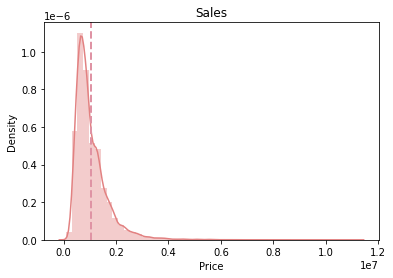

<IPython.core.display.Javascript object>

In [ ]:
#checking the target variables for distribution
sns.distplot(df['Price'],color=colors[4])

# 평균 지점에 세로선 
plt.axvline(x=df['Price'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Sales');

## Heatmap to show correlation

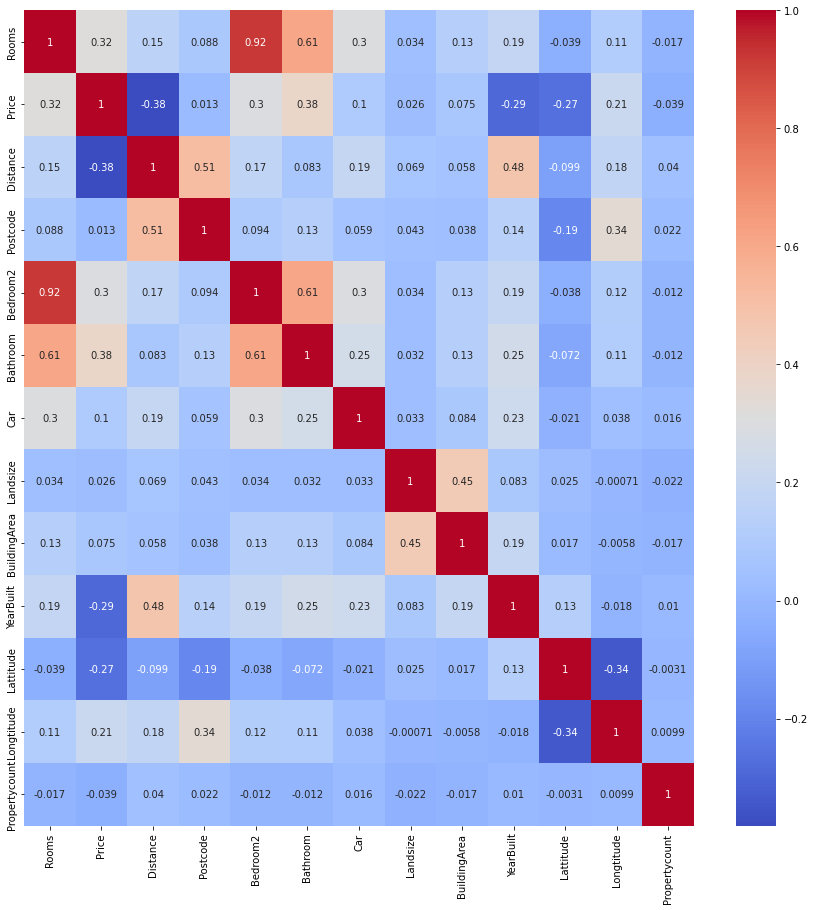

<IPython.core.display.Javascript object>

In [ ]:
# Build Heatmap to visualise correlations
fig, ax = plt.subplots(figsize=(15,15)) 
heat_map = sns.heatmap(df[df["Type"] == "h"].corr(), cmap = 'coolwarm', annot=True)

# Data Preprocessing

### Removing Duplicates

In [ ]:
df ['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,0.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,1.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,-2.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,-1.0


<IPython.core.display.Javascript object>

In [ ]:
df = df.drop(['Bedroom2', 'Rooms v Bedroom2'], 1)

<IPython.core.display.Javascript object>

### Remove false BuildingArea & Remove false BuildingArea
- Melbourne Founded 1835

In [ ]:
df = df[df['BuildingArea']!=0]

df = df[df['YearBuilt']> 1835]

<IPython.core.display.Javascript object>

In [ ]:
df.dropna(inplace = True)

<IPython.core.display.Javascript object>

# Additional pre-processing for computation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8840 entries, 2 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8840 non-null   object 
 1   Address        8840 non-null   object 
 2   Rooms          8840 non-null   int64  
 3   Type           8840 non-null   object 
 4   Price          8840 non-null   float64
 5   Method         8840 non-null   object 
 6   SellerG        8840 non-null   object 
 7   Date           8840 non-null   object 
 8   Distance       8840 non-null   float64
 9   Postcode       8840 non-null   float64
 10  Bathroom       8840 non-null   float64
 11  Car            8840 non-null   float64
 12  Landsize       8840 non-null   float64
 13  BuildingArea   8840 non-null   float64
 14  YearBuilt      8840 non-null   float64
 15  CouncilArea    8840 non-null   object 
 16  Lattitude      8840 non-null   float64
 17  Longtitude     8840 non-null   float64
 18  Regionn

<IPython.core.display.Javascript object>

In [ ]:
# Create features (x) and target (y)
X = df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]
y = df['Price']

<IPython.core.display.Javascript object>

In [ ]:
# Split the training data and test data
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

<IPython.core.display.Javascript object>

# Modeling 

## Gradient Boosting Regressor

GMB(Gradient Boosting Machine) 이란?  

틀린부분에 가중치를 더하면서 진행하는 알고리즘
- "트리 앙상블 모델"의 일종인 GBR(Gradient Boost Regressor)
- XGBoost와 같은 GBR은 Kaggle의 다양한 대회의 우승 코드에 자주 사용되고 있다. 
- gbr 모델은 빠르게 학습하지만 데이터를 과도하게 적합시킬 수 있다. 
- 첨부된 주피터 노트에서 보듯이, 이 모델은 0.1과 1 사이의 50개의 서로 다른 학습 속도를 반복적으로 실행하도록 구축되었다.

이것이 멜버른 주택 데이터 세트에 대한 최상의 회귀 모델임을 보장하기 위해 Linear regressor, Lasso regressor, and Random Forest Regressor에 대해 벤치마킹되었다. 

In [ ]:
# Initiate max R^2 score
max_r2 = 0
cnt = 1
for i in np.linspace(0.1, 1, 50): # 구간 내 숫자 채우기 
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(x_train, y_train)
    
    # prediction
    y_pred = gbr.predict(x_test)
    
    # Return values for corresponding learning rat
    print(f"#{cnt} \n")
    print ('For learning rate i: %0.2f' %i)
    print('Gradient Boosting R^2: %0.5f' %metrics.explained_variance_score(y_test,y_pred))
    print('Gradient Boosting Regression MAE: %0.5f'%metrics.mean_absolute_error(y_test,y_pred))
    print('Gradient Boosting MSE:%0.5f'%metrics.mean_squared_error(y_test,y_pred))
    print('Gradient Boosting RMSE:%0.5f'%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(y_test,y_pred) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test,y_pred)
        max_i = i
        y_pred_gbr = y_pred
        
        # Store Standard Error
        se_gbr = stats.sem(y_pred_gbr)
    cnt += 1 
# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.5f' %max_r2, 'with learning rate: %0.2f' %max_i)

#1 

For learning rate i: 0.10
Gradient Boosting R^2: 0.82625
Gradient Boosting Regression MAE: 175679.75501
Gradient Boosting MSE:80062980445.08183
Gradient Boosting RMSE:282954.02532
---------------------------------
#2 

For learning rate i: 0.12
Gradient Boosting R^2: 0.82919
Gradient Boosting Regression MAE: 174200.55207
Gradient Boosting MSE:78652180474.10234
Gradient Boosting RMSE:280449.96073
---------------------------------
#3 

For learning rate i: 0.14
Gradient Boosting R^2: 0.82970
Gradient Boosting Regression MAE: 173706.80379
Gradient Boosting MSE:78416511781.13406
Gradient Boosting RMSE:280029.48377
---------------------------------
#4 

For learning rate i: 0.16
Gradient Boosting R^2: 0.82919
Gradient Boosting Regression MAE: 172182.17231
Gradient Boosting MSE:78632090010.33339
Gradient Boosting RMSE:280414.14018
---------------------------------
#5 

For learning rate i: 0.17
Gradient Boosting R^2: 0.83496
Gradient Boosting Regression MAE: 171031.19006
Gradient Boosti

<IPython.core.display.Javascript object>

##  Linear Regression

주택 구입 가격과 특징 사이의 관계를 측정하여 최적의 회귀 직선을 예측한다 

In [ ]:
# Initialise Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Prediction
y_pred_lr = lr.predict(x_test)

# Return Results
print('Linear Regression R^2: %0.5f' %metrics.explained_variance_score(y_test,y_pred))
print('Linear Regression MAE: %0.5f'%metrics.mean_absolute_error(y_test,y_pred))
print('Linear Regression MSE: %0.5f'%metrics.mean_squared_error(y_test,y_pred))
print('Linear Regression RMSE: %0.5f'%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Store Standard Error
se_lr = stats.sem(y_pred_lr)

Linear Regression R^2: 0.75648
Linear Regression MAE: 207429.11852
Linear Regression MSE: 112064220770.62001
Linear Regression RMSE: 334759.94499


<IPython.core.display.Javascript object>

##  Lasso Regression

기존의 선형 회귀에선 적절한 가중치와 편향을 찾아내는 것이 관건이었다.    
라쏘는 거기에 추가적인 제약 조건을 준다. 
- 바로 MSE가 최소가 되게 하는 가중치와 편향을 찾는다.
- 가중치들의 절댓값의 합이 최소가 되게 한다는 것이다. 
    - 가중치의 모든 원소가 0이 되거나 0에 가깝게 되도록 찾음 

라쏘 회귀식의 장점    
- 제약 조건을 통해 일반화된 모형을 찾는다.
- 가중치들이 0이 되게 하여 해당하는 feature들을 제외해준다. 
- 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아진다.


In [ ]:
# Initialise Lasso Regression model
lcv = LassoCV()
lcv.fit(x_train, y_train)

# Make Prediction
y_pred_lcv = lcv.predict(x_test)

# Return Results
print('Lasso Regression R^2: %0.5f' %metrics.explained_variance_score(y_test,y_pred))
print('Lasso Regression MAE: %0.5f'%metrics.mean_absolute_error(y_test,y_pred))
print('Lasso Regression MSE: %0.5f'%metrics.mean_squared_error(y_test,y_pred))
print('Lasso Regression RMSE: %0.5f'%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

se_lcv = stats.sem(y_pred_lcv)

Lasso Regression R^2: 0.75648
Lasso Regression MAE: 207429.11852
Lasso Regression MSE: 112064220770.62001
Lasso Regression RMSE: 334759.94499


<IPython.core.display.Javascript object>

## Random Forest

- 하이퍼 파라미터 튜닝 없이도 잘 수행되는 "유연하고 사용하기 쉬운 기계 학습 알고리즘" 
- 의사 결정 트리로 구성되며 분류 및 회귀 모델에 모두 사용할 수 있지만 과적합 우려가 있다.

In [ ]:
# Initialise Max R^2 variable 
max_r2 = 0

#  64 --> 128 사이의 트리를 반복하며 최적인 나무 수 범위에서의의 최상 모델 수와 정확도/오류 점수를 반환
for n_trees in range (64, 129):
    
    # Initiate model for value n_tree
    rfr = RandomForestRegressor(n_estimators=n_trees, n_jobs=-1) 
    rfr.fit(x_train, y_train)
    
    # Make prediction for n_tree sized model
    y_pred = rfr.predict(x_test)
    
    # Store Standard Error
    rfr_sem = stats.sem (y_pred)
    
    # Print Results
    print('For a Random Forest with', n_trees, 'trees in total:')
    print('R^2: %0.5f' %metrics.explained_variance_score(y_test,y_pred))
    print('MAE: %0.5f'%metrics.mean_absolute_error(y_test,y_pred))
    print('MSE: %0.5f'%metrics.mean_squared_error(y_test,y_pred))
    print('RMSE: %0.5f'%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('--------------------------------------')
    
    # If new R^2 the max, store it for reference
    if metrics.explained_variance_score(y_test,y_pred) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test,y_pred)
        max_n_trees = n_trees
        max_rfr_sem = rfr_sem
        y_pred_rfr= y_pred
        
        # Store Standard Error
        se_rfr = stats.sem(y_pred_rfr)

# Return max R^2 and corresponding amount of trees in forest
print ('Max R^2 is: %0.5f' %max_r2, 'at', max_n_trees, 'trees')

For a Random Forest with 64 trees in total:
R^2: 0.82454
MAE: 164452.18769
MSE: 80990577226.31712
RMSE: 284588.43481
--------------------------------------
For a Random Forest with 65 trees in total:
R^2: 0.82516
MAE: 162979.32201
MSE: 80752160250.33286
RMSE: 284169.24579
--------------------------------------
For a Random Forest with 66 trees in total:
R^2: 0.81805
MAE: 164471.67169
MSE: 84039336092.40245
RMSE: 289895.38819
--------------------------------------
For a Random Forest with 67 trees in total:
R^2: 0.82672
MAE: 162862.89733
MSE: 79964588758.95346
RMSE: 282780.10672
--------------------------------------
For a Random Forest with 68 trees in total:
R^2: 0.82932
MAE: 163800.21165
MSE: 78814410678.81763
RMSE: 280739.04374
--------------------------------------
For a Random Forest with 69 trees in total:
R^2: 0.82819
MAE: 162154.80859
MSE: 79347395487.62508
RMSE: 281686.69739
--------------------------------------
For a Random Forest with 70 trees in total:
R^2: 0.82678
MAE: 16

<IPython.core.display.Javascript object>

# 결론 
> 마지막 코드 실행 결과와 상이함 

<br>

### 📌 분석의 목표 
- 멜버른 부동산 시장에서 주택 가격을 정확하게 예측하는 회귀 모델 구하기 

### 🎀 사용한 모델
- gradient boosting regressor (GBR) 
- linear regressor
- lasso regressor
- random forest regressor

### 🚀 Best Model 
**Gradient Boosting Regressor**    
```
#12 
For learning rate i: 0.30
Gradient Boosting R^2: 0.84755
Gradient Boosting Regression MAE: 163729.71058
Gradient Boosting MSE:70144526218.48685
Gradient Boosting RMSE:264848.11915
---------------------------------
```

학습률 lr = 0.3,   
R-제곱 값 = 0.84755,   
평균 제곱 오차(RMSE) = 264,848달러,   
평균 절대 오차(MAE) = 163729 달러를 달성했다. 
- 이는 GBR 모델이 모델의 분산의 거의 85%를 설명하고 예측 결과가 평균 ```264,848달러```만큼 부정확하다는 것을 의미한다.


### 🏡 Random Forest모델과 비교

```
For a Random Forest with 73 trees in total:
R^2: 0.83462
MAE: 160280.57830
MSE: 76333475122.67482
RMSE: 276285.13373
--------------------------------------
```
- RF의 MAE는 $160,280로 이 척도에서 GBR보다 더 나은 성능을 보였다. 
- GBR과 RF는 저자가 구축한 다른 선형 모델보다 눈에 띈다. 
- GBR 모델은 ```R-제곱``` 및 ```RMSE``` score에서 더 나은 성능을 발휘하는 반면 RF는 ```MAE``` score가 더 우수하다.




## 두 가지 중에서 가장 좋은 모델을 어떻게 결정할까요?

MAE와 RMSE는 모두 연속 변수 및 회귀 모델의 정확도를 측정하는 데 사용되는 가장 일반적인 평가 지표이다. 

오차가 제곱되기 때문에, RMSE는 더 큰 오차에 더 높은 가중치를 부여한다.   
큰 오차가 바람직하지 않을 때 더 유용한 점수이다.    

부동산 시장에서는 사용 가능한 자금의 양, 추가 자금 조달(모기지), 투자 수익률 등 다양한 요인이 더 큰 오차에 의해 부정적인 영향을 받는다. 

```    
예산을 100만 달러에서 105만 달러로 늘리는 것은 자연스럽다고 할 수 있지만, 
150만 달러로 늘릴 가능성은 훨씬 낮기 때문에 오차가 클 수록 안좋다는 것을 의미하는 듯하다. 
```

해당 데이터 셋 모델에서는 더 큰 오차가 발생할 경우 가중치를 높게 받아야 한다고 판단했다. 
결과적으로, RMSE가 이 데이터 세트의 MAE와 비교하여 회귀 모델을 평가하는 데 유리하다.
따라서 Gradient Boosting Regressor 모델이 적합하다고 생각한다. 